In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


#EDA/Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [5]:
df.nunique()

,0
Loan_ID,381
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,322
CoapplicantIncome,182
LoanAmount,101
Loan_Amount_Term,10


In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [7]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,271
N,110


In [8]:
df['Gender'].value_counts()

,count
Gender,
Male,291
Female,85


In [9]:
df['Gender'] = df['Gender'].fillna('Male')

In [10]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,325
Yes,35


In [11]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [12]:
df['Dependents'].value_counts()

,count
Dependents,
0,234
2,59
1,52
3+,28


In [13]:
df['Dependents'] = df['Dependents'].fillna('0')

In [14]:
df['LoanAmount'].value_counts()

,count
LoanAmount,
120.0,19
110.0,16
100.0,15
128.0,11
113.0,11
...,...
36.0,1
61.0,1
146.0,1


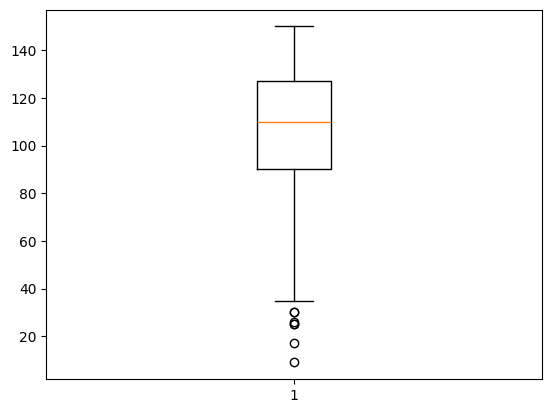

In [15]:
plt.boxplot(df['LoanAmount'])
plt.show()

In [16]:
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,312
180.0,29
480.0,11
300.0,7
120.0,3
84.0,3
240.0,2
60.0,1
12.0,1


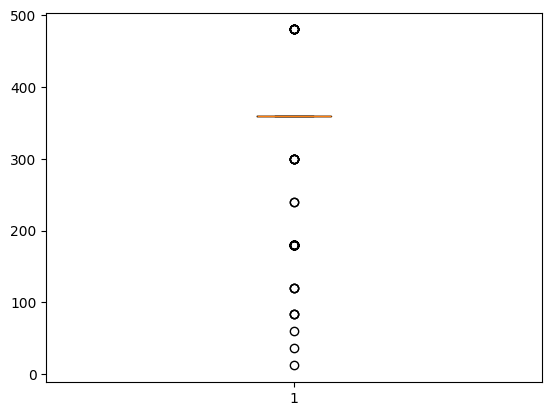

In [17]:
df['Loan_Amount_Term'] = pd.to_numeric(df['Loan_Amount_Term'], errors='coerce')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)
plt.boxplot(df['Loan_Amount_Term'])
plt.show()

In [18]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,294
0.0,57


In [19]:
df.groupby(['Self_Employed', 'Education'])['Credit_History'].value_counts()

Self_Employed  Education     Credit_History
No             Graduate      1.0               199
                             0.0                38
               Not Graduate  1.0                68
                             0.0                15
Yes            Graduate      1.0                17
                             0.0                 4
               Not Graduate  1.0                10
Name: count, dtype: int64

In [20]:
df['Credit_History'] = df['Credit_History'].fillna(-1.0)

In [21]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['IncomePerFamily'] = df['TotalIncome'] / (df['Dependents'] + 1)

In [22]:
df['TotalIncome'].value_counts()

,count
TotalIncome,
2500.0,4
3750.0,4
4583.0,4
6500.0,3
4750.0,3
...,...
6506.0,1
3244.0,1
4408.0,1


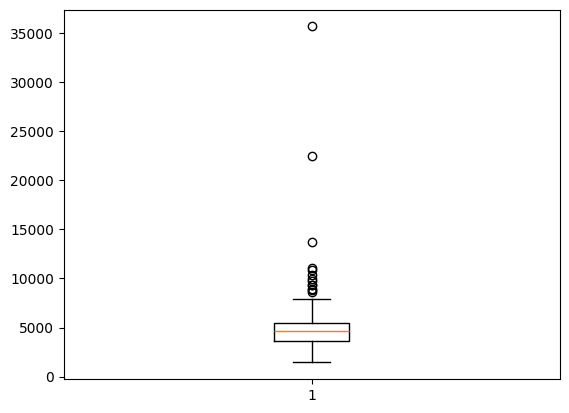

In [23]:
plt.boxplot(df['TotalIncome'])
plt.show()

In [24]:
df = pd.get_dummies(df, columns =['Gender', 'Married', 'Education', 'Credit_History', 'Self_Employed', 'Property_Area'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  381 non-null    object 
 1   Dependents               381 non-null    float64
 2   ApplicantIncome          381 non-null    int64  
 3   CoapplicantIncome        381 non-null    float64
 4   LoanAmount               381 non-null    float64
 5   Loan_Amount_Term         381 non-null    float64
 6   Loan_Status              381 non-null    object 
 7   TotalIncome              381 non-null    float64
 8   IncomePerFamily          381 non-null    float64
 9   Gender_Female            381 non-null    bool   
 10  Gender_Male              381 non-null    bool   
 11  Married_No               381 non-null    bool   
 12  Married_Yes              381 non-null    bool   
 13  Education_Graduate       381 non-null    bool   
 14  Education_Not Graduate   3

#Treinamento do modelo com Decision Tree

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']
y = y.map({'Y': 1, 'N': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

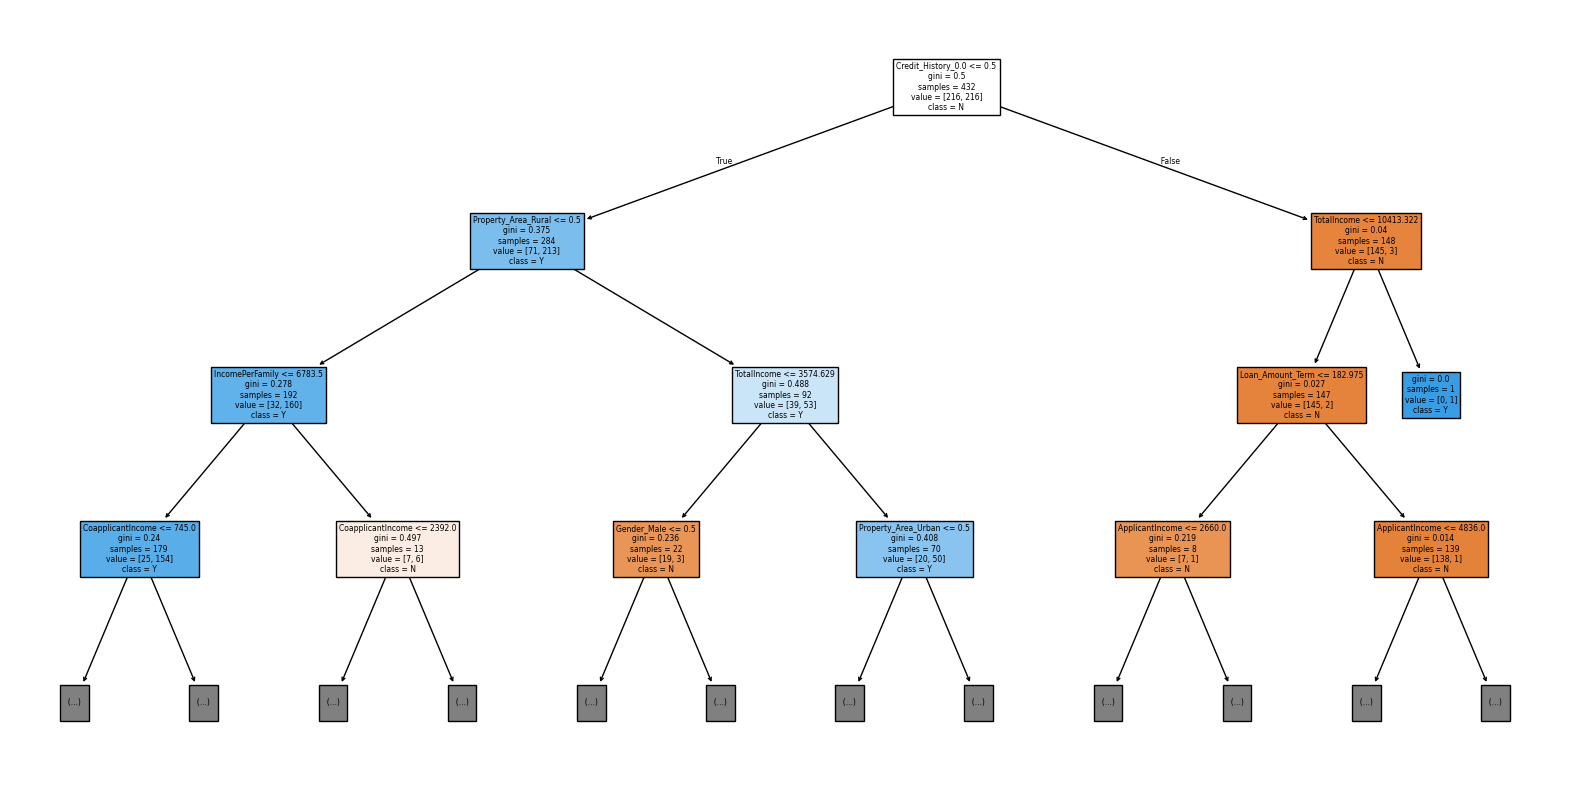

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["N", "Y"], filled=True, max_depth = 3)
plt.show()

In [28]:
y_pred = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.7792207792207793


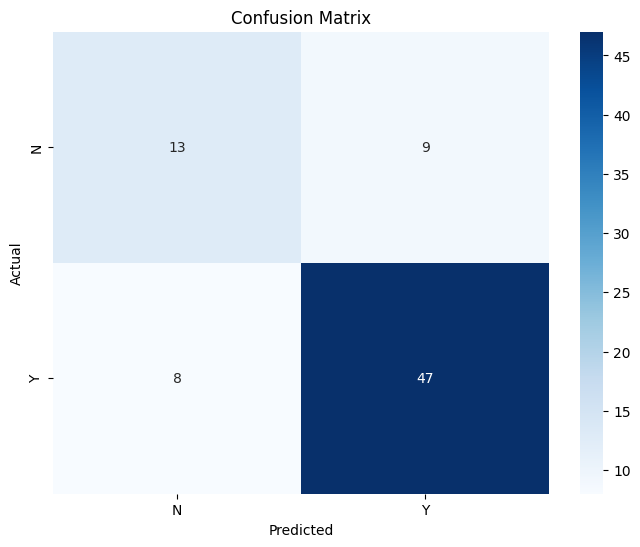

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.62      0.59      0.60        22
           1       0.84      0.85      0.85        55

    accuracy                           0.78        77
   macro avg       0.73      0.72      0.73        77
weighted avg       0.78      0.78      0.78        77



#Treinamento do modelo com Random Forest

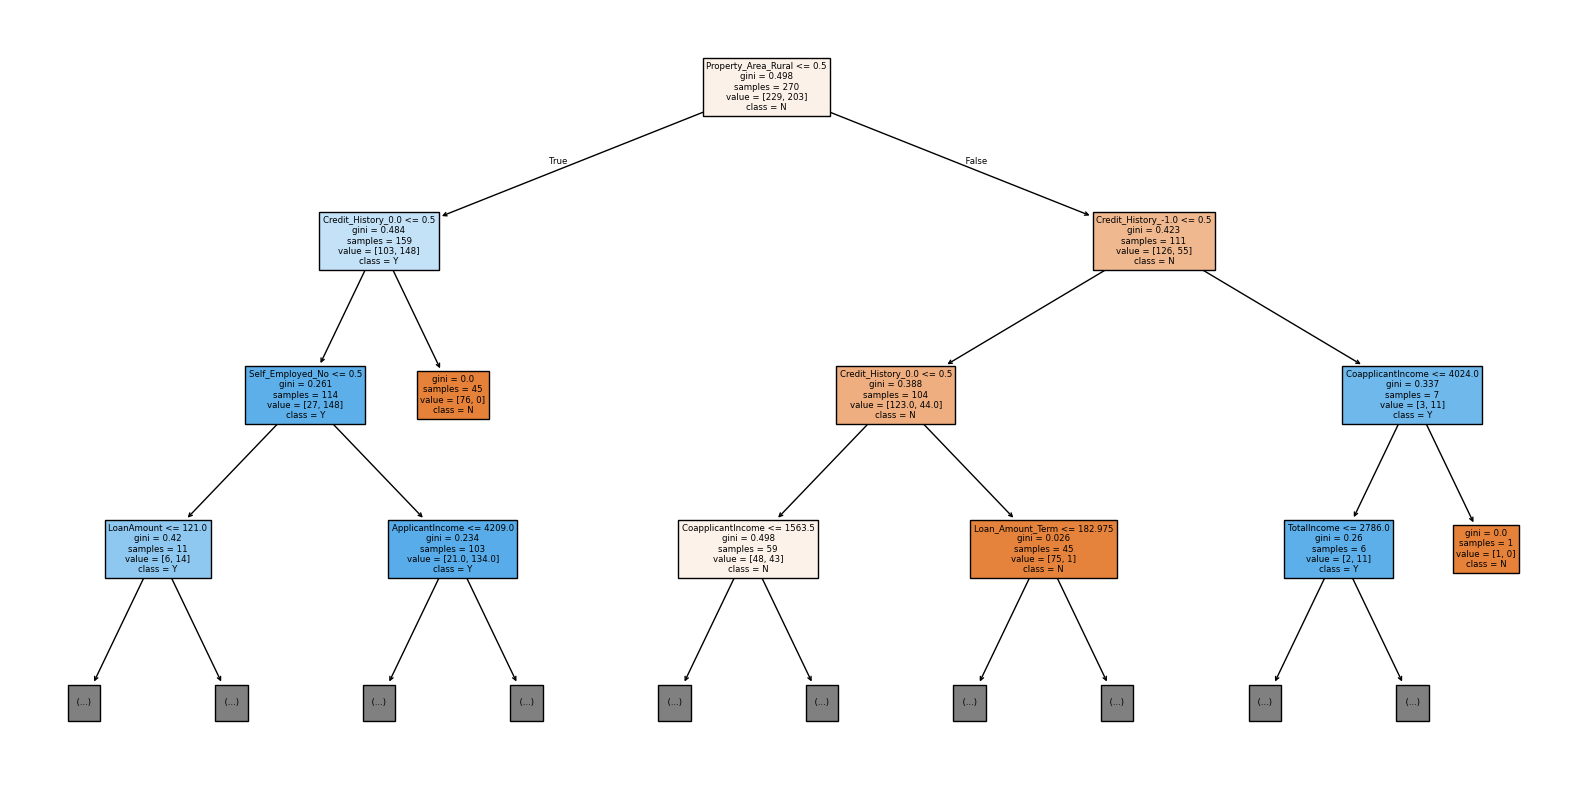

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=["N", "Y"], filled=True, max_depth = 3)
plt.show()

In [32]:
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
treshold = 0.6
y_pred_treshold = (y_probs_rf >= treshold).astype(int)
print('Acurácia: \n', accuracy_score(y_test, y_pred_treshold))

Acurácia: 
 0.8961038961038961


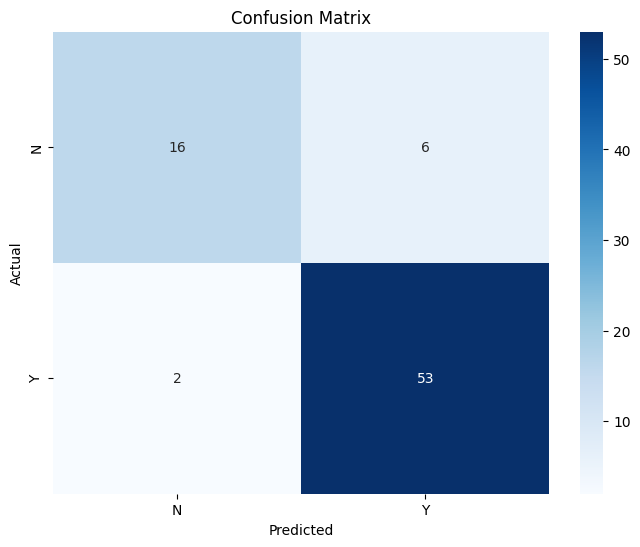

In [33]:
cm = confusion_matrix(y_test, y_pred_treshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
print("Relatório de classificação:\n", classification_report(y_test, y_pred_treshold))

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        22
           1       0.90      0.96      0.93        55

    accuracy                           0.90        77
   macro avg       0.89      0.85      0.86        77
weighted avg       0.90      0.90      0.89        77



#Treinamento do modelo com XGBoost

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier


xgb_model = XGBClassifier(eval_metric='logloss', enable_categorical = True)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_model.predict(X_test)

In [66]:
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
treshold = 0.2
y_pred_treshold = (y_probs_xgb >= treshold).astype(int)
print('Acurácia: \n', accuracy_score(y_test, y_pred_treshold))

Acurácia: 
 0.8831168831168831


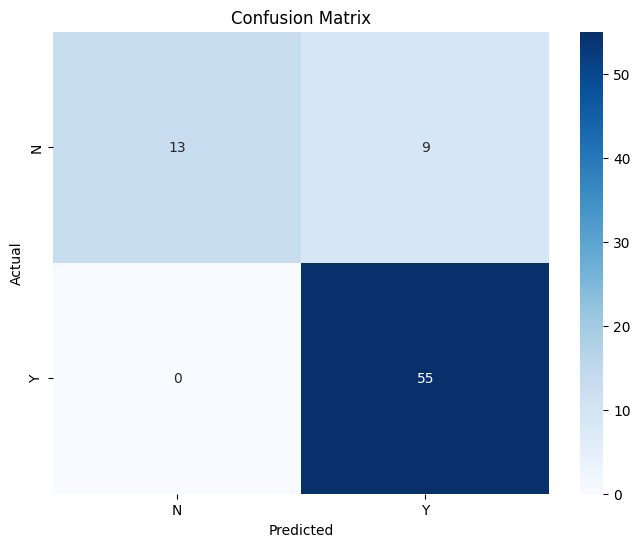

In [67]:
cm = confusion_matrix(y_test, y_pred_treshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [68]:
print("Relatório de classificação:\n", classification_report(y_test, y_pred_treshold))

Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      0.59      0.74        22
           1       0.86      1.00      0.92        55

    accuracy                           0.88        77
   macro avg       0.93      0.80      0.83        77
weighted avg       0.90      0.88      0.87        77



In [69]:
treshold = 0.6
y_pred_treshold = (y_probs_xgb >= treshold).astype(int)
print('Acurácia: \n', accuracy_score(y_test, y_pred_treshold))

Acurácia: 
 0.8571428571428571


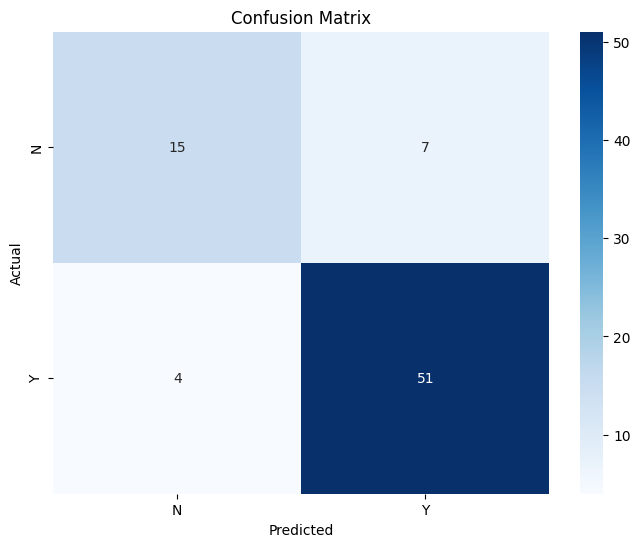

In [70]:
cm = confusion_matrix(y_test, y_pred_treshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [71]:
print("Relatório de classificação:\n", classification_report(y_test, y_pred_treshold))

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.79      0.68      0.73        22
           1       0.88      0.93      0.90        55

    accuracy                           0.86        77
   macro avg       0.83      0.80      0.82        77
weighted avg       0.85      0.86      0.85        77

